In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import fetch_data as fd
import geopandas as gpd
import matplotlib.patheffects as pe
import contextily

from fetch_data import fetch_traffic_data
from fetch_data import get_city_info
fetch_traffic_data()
get_city_info()

Already have 2016.csv, skipping...
Already have 2017.csv, skipping...
Already have 2018.csv, skipping...
Already have 2019.csv, skipping...
Already have 2020.csv, skipping...
Already have 2021.csv, skipping...
Already have 2022.csv, skipping...
Already have 2023.csv, skipping...
Already have 2024.csv, skipping...


regional key               city   sq km  population
0        11000000             Berlin  891.12     3685265
1        02000000            Hamburg  755.09     1862565
2        09162000            München  310.70     1505005
3        05315000               Köln  405.02     1024621
4        06412000  Frankfurt am Main  248.31      756021
...           ...                ...     ...         ...
2054     16075127         Ziegenrück    8.25         626
2055     16071061            Neumark    8.67         462
2056     16069052         Ummerstadt   15.73         455
2057     03354021      Schnackenburg   23.70         447
2058     01059002              Arnis    0.45         251

[2059 rows x 4 columns]

In [2]:
YEARS = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
df_dict = fd.get_dfs(YEARS)
df = pd.concat(df_dict.values())
city_info = fd.get_city_info()
df.describe()

OID_         UJAHR        UMONAT       USTUNDE    UWOCHENTAG  \
count  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06   
mean   1.196338e+05  2.020357e+03  6.754927e+00  1.333360e+01  4.099909e+00   
std    7.185906e+04  2.490690e+00  3.203685e+00  4.788369e+00  1.873301e+00   
min    1.000000e+00  2.016000e+03  1.000000e+00  0.000000e+00  1.000000e+00   
25%    5.827900e+04  2.018000e+03  4.000000e+00  1.000000e+01  3.000000e+00   
50%    1.165570e+05  2.020000e+03  7.000000e+00  1.400000e+01  4.000000e+00   
75%    1.777310e+05  2.023000e+03  9.000000e+00  1.700000e+01  6.000000e+00   
max    2.690480e+05  2.024000e+03  1.200000e+01  2.300000e+01  7.000000e+00   

         UKATEGORIE          UART         UTYP1    ULICHTVERH   USTRZUSTAND  \
count  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06   
mean   2.800768e+00  3.871103e+00  3.827973e+00  4.320318e-01  2.791309e-01   
std    4.232954e-01  2.626432e+00  2.152959e+00  7.898641e-01  4.944200e-01   
min    1.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00  2.000000e+00  2.000000e+00  0.000000e+00  0.000000e+00   
50%    3.000000e+00  4.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00   
75%    3.000000e+00  5.000000e+00  6.000000e+00  0.000000e+00  1.000000e+00   
max    3.000000e+00  9.000000e+00  7.000000e+00  2.000000e+00  2.000000e+00   

             IstRad        IstPKW       IstFuss       IstKrad       IstGkfz  \
count  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06  1.902790e+06   
mean   2.987790e-01  7.728147e-01  8.796536e-02  1.382752e-01  4.725167e-02   
std    4.577228e-01  4.190134e-01  2.832446e-01  3.451887e-01  2.121767e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

        IstSonstige       LINREFX       LINREFY     XGCSWGS84     YGCSWGS84  
count  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06  2.098019e+06  
mean   1.155952e-01  5.595002e+05  5.623096e+06  9.845719e+00  5.073774e+01  
std    3.197390e-01  1.461430e+05  2.039809e+05  2.083310e+00  1.831311e+00  
min    0.000000e+00  2.804374e+05  5.240628e+06  5.867262e+00  4.731220e+01  
25%    0.000000e+00  4.471891e+05  5.448162e+06  8.253147e+00  4.917560e+01  
50%    0.000000e+00  5.466854e+05  5.636976e+06  9.670647e+00  5.084954e+01  
75%    0.000000e+00  6.796106e+05  5.792010e+06  1.147224e+01  5.226652e+01  
max    1.000000e+00  9.204492e+05  6.100725e+06  1.502868e+01  5.505184e+01

In [3]:
Frankfurt = df[df["Community_key"] == "06412000"]
Frankfurt.shape
Frankfurt.groupby("UKATEGORIE").size()

UKATEGORIE
1      107
2     2760
3    19633
dtype: int64

In [4]:
Frankfurt.head()

OID_ ULAND UREGBEZ UKREIS UGEMEINDE  UJAHR  UMONAT  USTUNDE  UWOCHENTAG  \
8575  8576    06       4     12       000   2016       1       19           7   
8664  8665    06       4     12       000   2016       1        0           1   
8978  8979    06       4     12       000   2016       1       15           7   
9024  9025    06       4     12       000   2016       1        2           1   
9074  9075    06       4     12       000   2016       1        3           6   

      UKATEGORIE  ...  IstFuss  IstKrad  IstGkfz  IstSonstige      LINREFX  \
8575           3  ...        0        0      0.0            0  471854.4512   
8664           3  ...        0        0      0.0            0  465949.1018   
8978           1  ...        0        0      0.0            0  467209.1346   
9024           2  ...        0        0      0.0            0  475327.1534   
9074           3  ...        0        0      0.0            0  477911.2036   

           LINREFY  XGCSWGS84  YGCSWGS84  Community_key        UID  
8575  5.545148e+06   8.606800  50.057949       06412000  2016_8576  
8664  5.551119e+06   8.523772  50.111344       06412000  2016_8665  
8978  5.550947e+06   8.541409  50.109870       06412000  2016_8979  
9024  5.547310e+06   8.655174  50.077547       06412000  2016_9025  
9074  5.548912e+06   8.691196  50.092058       06412000  2016_9075  

[5 rows x 26 columns]

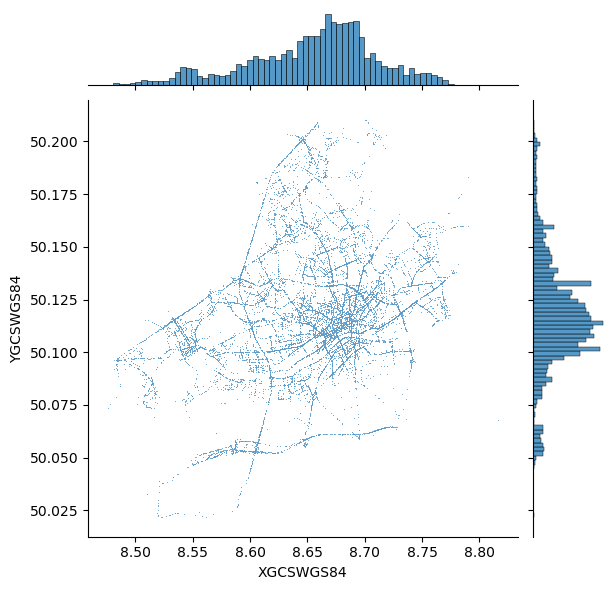

In [5]:
# Generate scatter plot
sns.jointplot(x="XGCSWGS84", y="YGCSWGS84", data=Frankfurt, s=0.5)


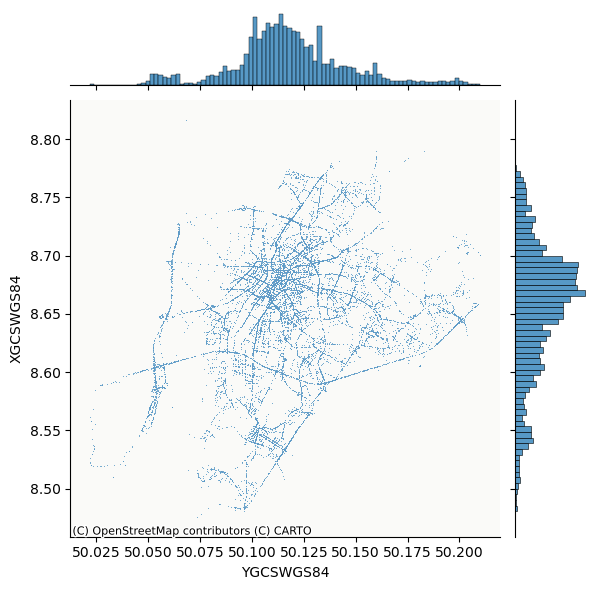

In [6]:
# Generate scatter plot
joint_axes = sns.jointplot(
    x="YGCSWGS84", y="XGCSWGS84", data=Frankfurt, s=0.5
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
);

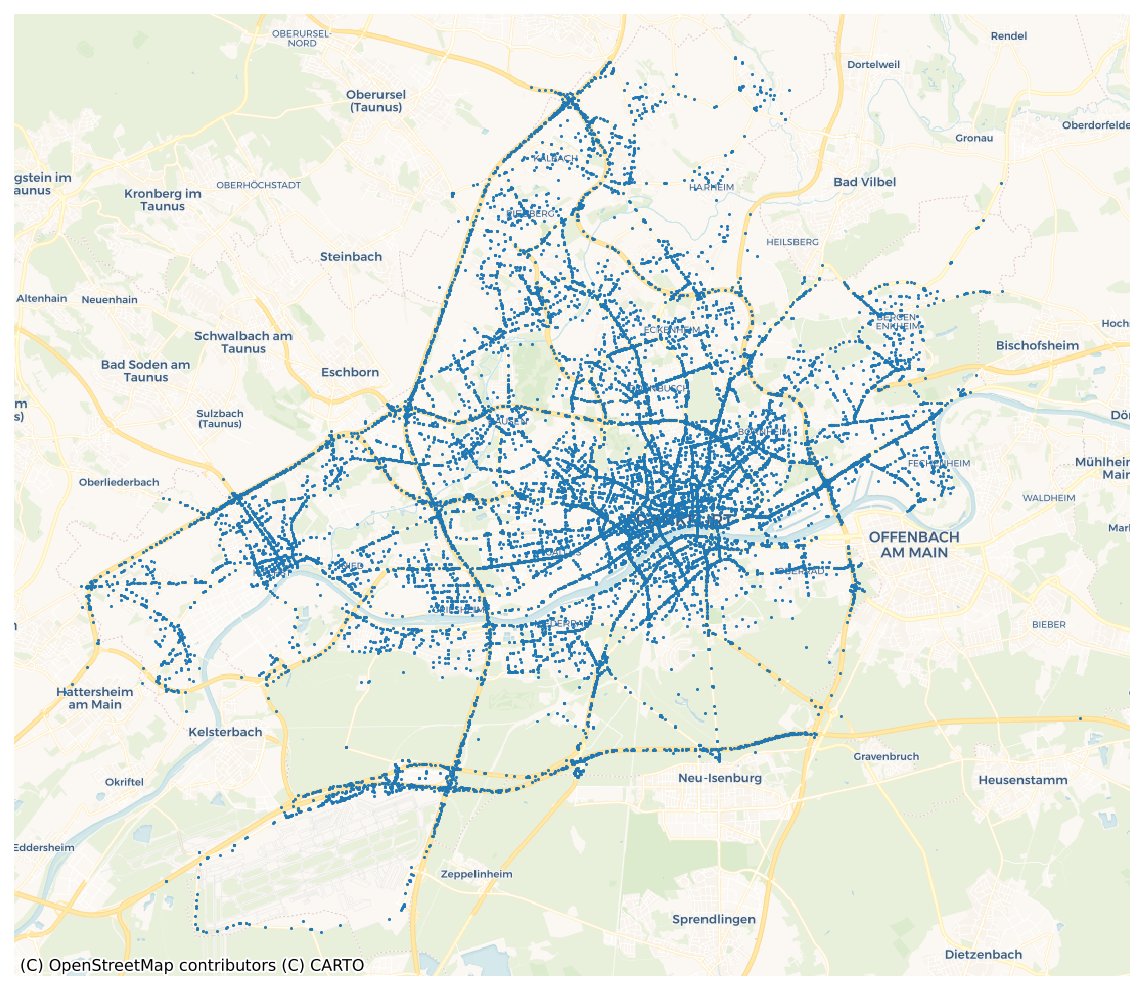

In [7]:
gdf = gpd.GeoDataFrame(
    Frankfurt,
    geometry=gpd.points_from_xy(Frankfurt.XGCSWGS84, Frankfurt.YGCSWGS84),
    crs="EPSG:4326"  # Tell it the coordinates are Lat/Lon
)
# 2. Convert (re-project) the data to Web Mercator (the map's projection)
gdf_wm = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10), dpi=144)

gdf_wm.plot(ax=ax, markersize=0.3, alpha=1)
contextily.add_basemap(
    ax,
    #source=contextily.providers.CartoDB.PositronNoLabels
    #source=contextily.providers.OpenStreetMap.Mapnik
    source=contextily.providers.CartoDB.Voyager, zoom=12, interpolation='None'
)
ax.set_axis_off()

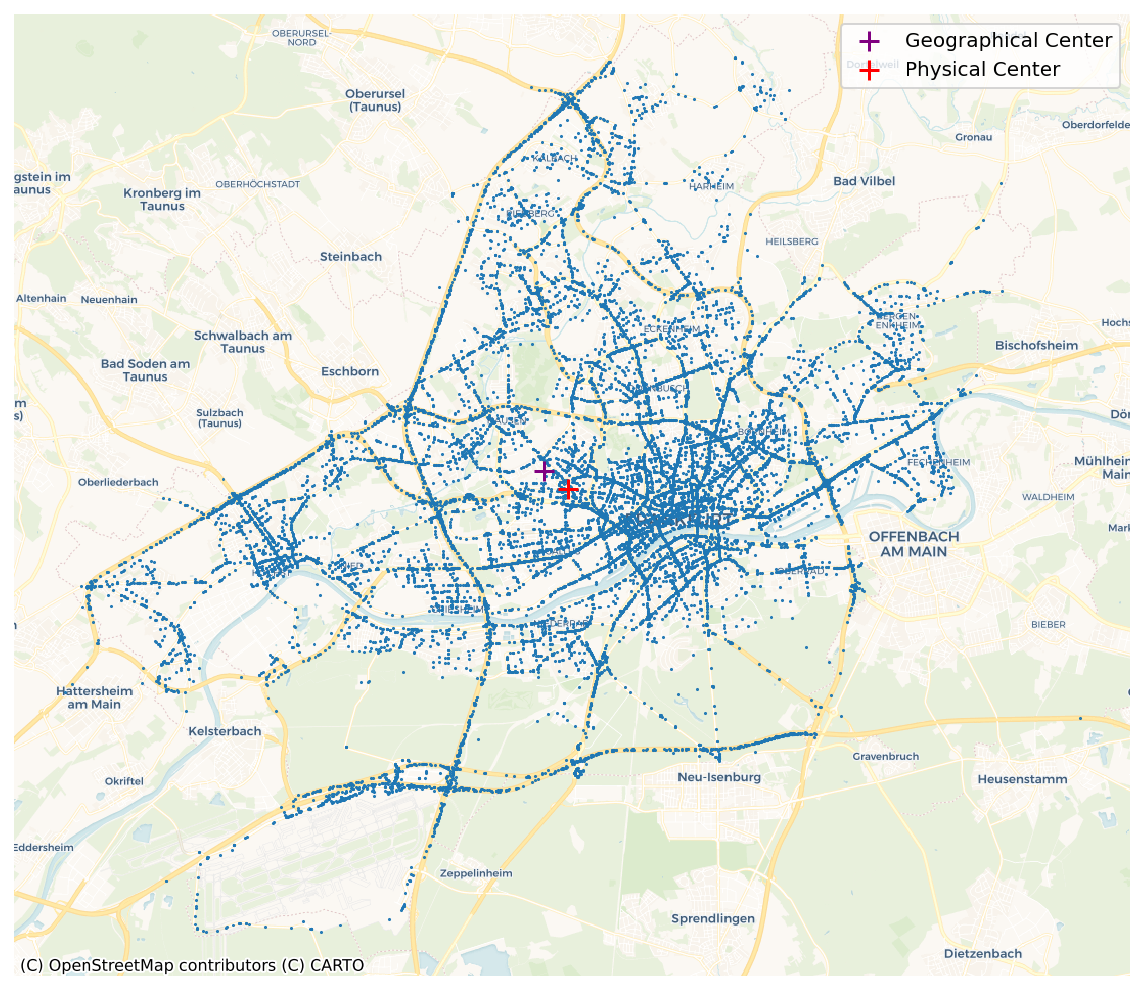

In [28]:
from shapely.geometry import Point
gdf = gpd.GeoDataFrame(
    Frankfurt,
    geometry=gpd.points_from_xy(Frankfurt.XGCSWGS84, Frankfurt.YGCSWGS84),
    crs="EPSG:4326"  # Tell it the coordinates are Lat/Lon
)

# Convert (re-project) the data to Web Mercator (the map's projection)
gdf_wm = gdf.to_crs(epsg=3857)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 10), dpi=144)

#Plot main data
gdf_wm.plot(ax=ax, markersize=0.3, alpha=1)


# 5. Define and plot the FIRST point (Green Cross)
point1_latlon = Point(8.636583, 50.121250)
point1_gdf = gpd.GeoDataFrame(geometry=[point1_latlon], crs="EPSG:4326")
point1_gdf_wm = point1_gdf.to_crs(epsg=3857)

point1_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='Purple',
    markersize=100,
    label="Geographical Center"
)

# 6. Define and plot the SECOND point (Blue Cross)
point2_latlon = Point(8.644417, 50.117306)
point2_gdf = gpd.GeoDataFrame(geometry=[point2_latlon], crs="EPSG:4326")
point2_gdf_wm = point2_gdf.to_crs(epsg=3857)

point2_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='red',
    markersize=100,
    label="Physical Center"
)

contextily.add_basemap(
    ax,
    crs=gdf_wm.crs,  # Use the CRS from our projected data
    source=contextily.providers.CartoDB.Voyager, 
    zoom=12, 
    interpolation='None'
)
ax.set_axis_off()
ax.legend()
plt.show()

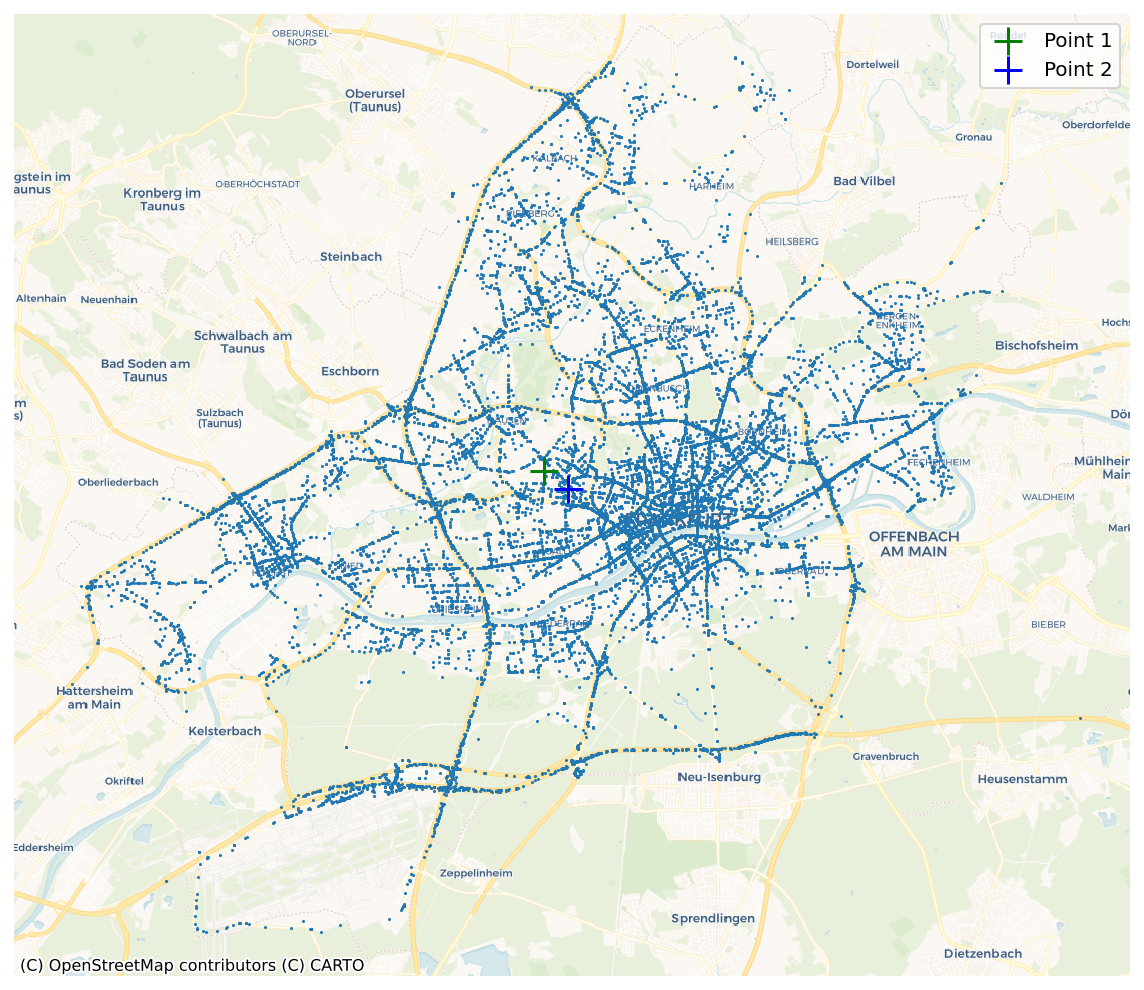

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily
import pandas as pd
from shapely.geometry import Point

# --- Setup: Load your Frankfurt data ---
# (This just creates dummy data if 'Frankfurt' isn't already loaded)
if 'Frankfurt' not in locals():
    print("Creating dummy 'Frankfurt' DataFrame...")
    data = {
        'XGCSWGS84': [8.6821, 8.6825, 8.6830, 8.6835, 8.6840, 8.6845, 8.6850, 8.6855, 8.6860, 8.6865, 8.6870, 8.6875, 8.6880, 8.6885, 8.6890, 8.6895, 8.6900, 8.6905, 8.6910, 8.6915, 8.6920, 8.6925, 8.6930, 8.6935, 8.6940, 8.6945, 8.6950, 8.6955, 8.6960, 8.6965, 8.6970, 8.6975, 8.6980, 8.6985, 8.6990, 8.6995, 8.7000, 8.7005, 8.7010, 8.7015, 8.7020, 8.7025, 8.7030, 8.7035, 8.7040, 8.7045, 8.7050, 8.7055, 8.7060, 8.7065],
        'YGCSWGS84': [50.1109, 50.1110, 50.1111, 50.1112, 50.1113, 50.1114, 50.1115, 50.1116, 50.1117, 50.1118, 50.1119, 50.1120, 50.1121, 50.1122, 50.1123, 50.1124, 50.1125, 50.1126, 50.1127, 50.1128, 50.1129, 50.1130, 50.1131, 50.1132, 50.1133, 50.1134, 50.1135, 50.1136, 50.1137, 50.1138, 50.1139, 50.1140, 50.1141, 50.1142, 50.1143, 50.1144, 50.1145, 50.1146, 50.1147, 50.1148, 50.1149, 50.1150, 50.1151, 50.1152, 50.1153, 50.1154, 50.1155, 50.1156, 50.1157, 50.1158]
    }
    Frankfurt = pd.DataFrame(data)
# --- End of dummy data ---


# 1. Convert your DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    Frankfurt,
    geometry=gpd.points_from_xy(Frankfurt.XGCSWGS84, Frankfurt.YGCSWGS84),
    crs="EPSG:4326"  # Tell it the coordinates are Lat/Lon
)

# 2. Convert (re-project) the data to Web Mercator (the map's projection)
gdf_wm = gdf.to_crs(epsg=3857)

# 3. Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 10), dpi=144)

# 4. Plot your main data
gdf_wm.plot(ax=ax, markersize=0.3, alpha=1)

# === START: ADD YOUR POINTS ===

# 5. Define and plot the FIRST point (Green Cross)
point1_latlon = Point(8.636583, 50.121250)
point1_gdf = gpd.GeoDataFrame(geometry=[point1_latlon], crs="EPSG:4326")
point1_gdf_wm = point1_gdf.to_crs(epsg=3857)

point1_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='green',
    markersize=200,
    label="Point 1"
)

# 6. Define and plot the SECOND point (Blue Cross)
point2_latlon = Point(8.644417, 50.117306)
point2_gdf = gpd.GeoDataFrame(geometry=[point2_latlon], crs="EPSG:4326")
point2_gdf_wm = point2_gdf.to_crs(epsg=3857)

point2_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='blue',
    markersize=200,
    label="Point 2"
)

# === END: ADD YOUR POINTS ===

# 7. Add the basemap
contextily.add_basemap(
    ax,
    crs=gdf_wm.crs,  # Use the CRS from our projected data
    source=contextily.providers.CartoDB.Voyager, 
    zoom=12, 
    interpolation='None'
)

# 8. Clean up and show
ax.set_axis_off()
ax.legend()
plt.show()

# If you want to save it instead of showing:
# plt.savefig("frankfurt_map_with_points.png", bbox_inches='tight', pad_inches=0)

Loading City Districts from WFS (this may take a moment)...
City Districts loaded.


C:\Users\Adria\AppData\Local\Temp\ipykernel_23816\3482665156.py:82: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


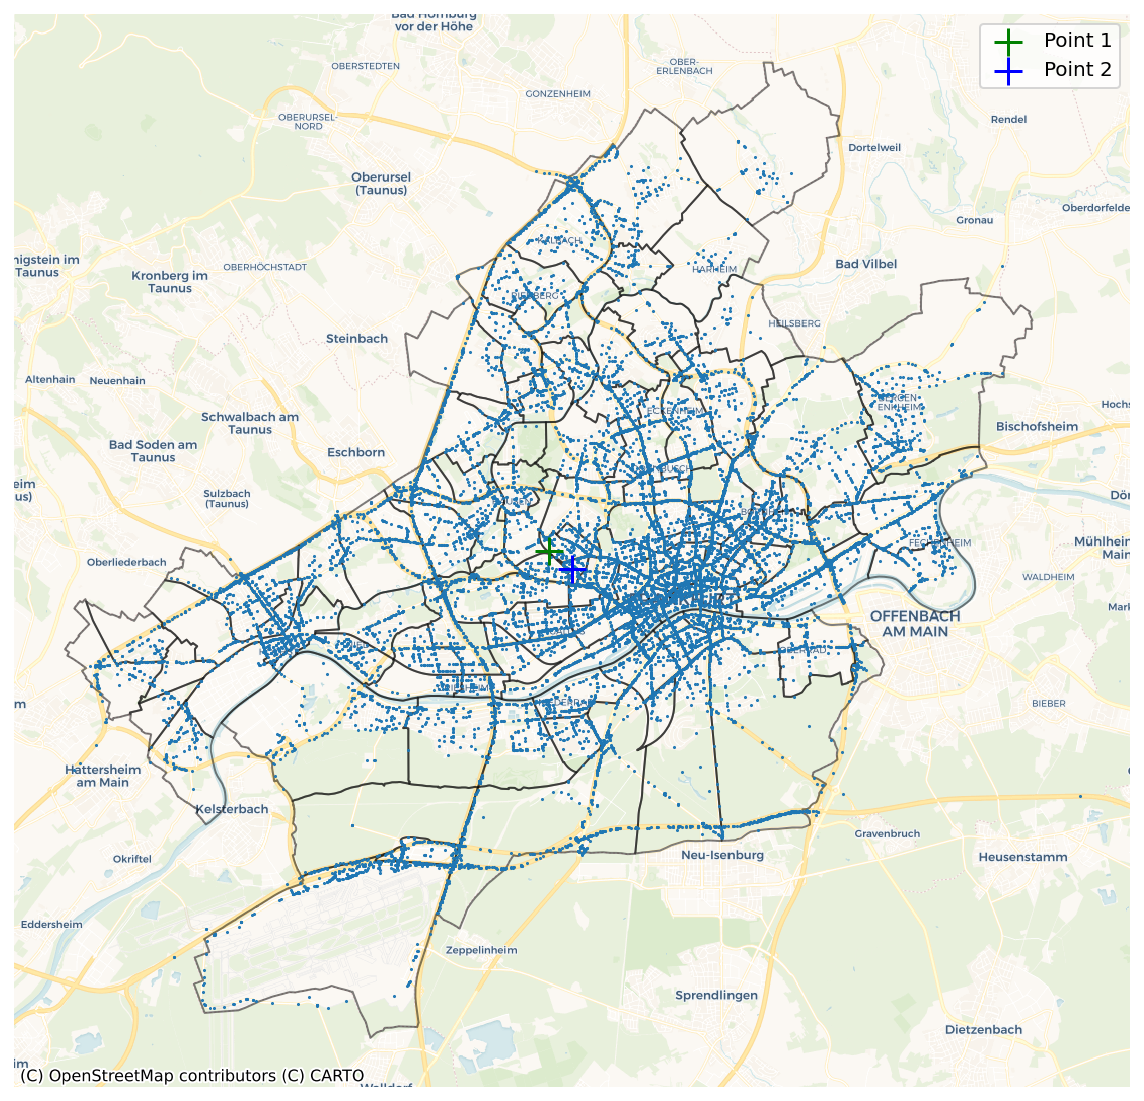

In [ ]:
gdf = gpd.GeoDataFrame(
    Frankfurt,
    geometry=gpd.points_from_xy(Frankfurt.XGCSWGS84, Frankfurt.YGCSWGS84),
    crs="EPSG:4326"
)
gdf_wm = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10), dpi=144)

wfs_url = "https://geowebdienste.frankfurt.de/WFS_Stadtgebietsgliederung?request=GetFeature&service=WFS&version=1.1.0&typeName=Stadtgebietsgliederung:Stadtbezirke&outputFormat=GML3"

try:
    districts_gdf = gpd.read_file(wfs_url)
    print("City Districts loaded.")
    
    # Re-project
    districts_gdf_wm = districts_gdf.to_crs(epsg=3857)
    
    districts_gdf_wm.plot(
        ax=ax,
        facecolor='none', # No fill
        edgecolor='black',  # Black outlines
        linewidth=1.0,
        alpha=0.5,         # Semi-transparent outlines
        label="City Districts"
    )
except Exception as e:
    print(f"WARNING: Could not load City Districts from WFS. Skipping this layer. Error: {e}")

shapefile_path = "roads.zip" 

try:
    roads_gdf = gpd.read_file(shapefile_path)
    print("Road network loaded.")
    roads_gdf_wm = roads_gdf.to_crs(epsg=3857)
    
    roads_gdf_wm.plot(
        ax=ax,
        edgecolor='gray',
        linewidth=0.5,
        alpha=0.7,
        label="Road Network"
    )
except Exception as e:
    print(f"WARNING: Could not load 'roads.zip'. Make sure it's in the same folder as your script. Skipping this layer. Error: {e}")

gdf_wm.plot(ax=ax, markersize=0.3, alpha=1)

point1_latlon = Point(8.636583, 50.121250)
point1_gdf = gpd.GeoDataFrame(geometry=[point1_latlon], crs="EPSG:4326")
point1_gdf_wm = point1_gdf.to_crs(epsg=3857)

point1_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='green',
    markersize=200,
    label="Point 1"
)

point2_latlon = Point(8.644417, 50.117306)
point2_gdf = gpd.GeoDataFrame(geometry=[point2_latlon], crs="EPSG:4326")
point2_gdf_wm = point2_gdf.to_crs(epsg=3857)

point2_gdf_wm.plot(
    ax=ax,
    marker='+',
    color='blue',
    markersize=200,
    label="Point 2"
)
contextily.add_basemap(
    ax,
    crs=gdf_wm.crs,
    source=contextily.providers.CartoDB.Voyager, 
    zoom=12, 
    interpolation='None'
)

ax.set_axis_off()
ax.legend()
plt.show()